In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd

In [2]:
c = 2.99792458E10  # cm per sec, light speed
h = 6.626070040812E-27  # erg*sec, Planck constant
k = 1.380648528E-16  # erg/K, Boltzmann constant
sun_radius = 695700 * 10 ** 5 #cm
parsec = 3.086e+18 #cm

In [3]:
fig_dir =  Path('./../reports/figures/')
data_dir = Path('./../mesa-r22.05.1/star/ay204_hw2/')

In [4]:
files = {'0.2' : data_dir/'LOGS_02/profile53.data',
         '1' : data_dir/'LOGS_1/profile4.data',
         '5' : data_dir/'LOGS_5/profile4.data',
         '20' : data_dir/'LOGS_20/profile3.data',
         '100' : data_dir/'LOGS_100/profile5.data'
        }

colors = ['tab:orange', 'tab:blue', 'tab:red', 'tab:green', 'tab:pink']

## 1

In [5]:
star02 = pd.read_csv(files['0.2'], sep='\s+', header=4)
star1  = pd.read_csv(files['1'], sep='\s+', header=4)
star5  = pd.read_csv(files['5'], sep='\s+', header=4)
star20 = pd.read_csv(files['20'], sep='\s+', header=4)
star100= pd.read_csv(files['100'], sep='\s+', header=4)

In [6]:
for model in [star02, star1, star5, star20, star100]:
    model['lnP']   = model['logP'] / np.log10(np.e)
    model['lnRho'] = model['logRho'] / np.log10(np.e)
    model['lnT']   = model['logT'] / np.log10(np.e)
    
    gammas = np.diff(model['lnP']) / np.diff(model['lnRho'])
    model['gamma'] = np.append(gammas, gammas[-1])
    
    deltas = np.diff(model['lnT']) / np.diff(model['lnP'])
    model['delta'] = np.append(deltas, deltas[-1])

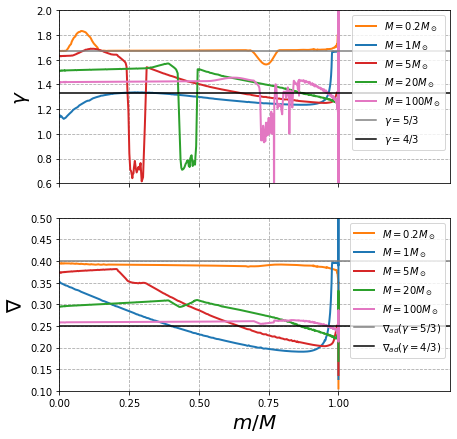

In [7]:
fig, ax = plt.subplots(2, 1, figsize=(7,7), sharex=True)

ax[0].plot(star02['mass']  / star02['mass'][0],  star02['gamma'], c=colors[0], lw=2, label='$M = 0.2 M_\odot$')
ax[0].plot(star1['mass']   / star1['mass'][0],   star1['gamma'],  c=colors[1], lw=2, label='$M = 1 M_\odot$')
ax[0].plot(star5['mass']   / star5['mass'][0],   star5['gamma'],  c=colors[2], lw=2, label='$M = 5 M_\odot$')
ax[0].plot(star20['mass']  / star20['mass'][0],  star20['gamma'], c=colors[3], lw=2, label='$M = 20 M_\odot$')
ax[0].plot(star100['mass'] / star100['mass'][0], star100['gamma'],c=colors[4], lw=2, label='$M = 100 M_\odot$')
ax[0].axhline(5/3, c='gray', lw=1.5, label=r'$\gamma=5/3$')
ax[0].axhline(4/3, c='black', lw=1.5, label=r'$\gamma=4/3$')
ax[0].set_ylim(0.6, 2)
ax[0].grid(c='#aaaaaa', ls='--')

ax[0].legend()
ax[0].set_ylabel(r'$\gamma$', size=20)


ax[1].plot(star02['mass']  / star02['mass'][0],  star02['delta'], c=colors[0], lw=2, label='$M = 0.2 M_\odot$')
ax[1].plot(star1['mass']   / star1['mass'][0],   star1['delta'],  c=colors[1], lw=2, label='$M = 1 M_\odot$')
ax[1].plot(star5['mass']   / star5['mass'][0],   star5['delta'],  c=colors[2], lw=2, label='$M = 5 M_\odot$')
ax[1].plot(star20['mass']  / star20['mass'][0],  star20['delta'], c=colors[3], lw=2, label='$M = 20 M_\odot$')
ax[1].plot(star100['mass'] / star100['mass'][0], star100['delta'],c=colors[4], lw=2, label='$M = 100 M_\odot$')
ax[1].axhline((5/3 - 1) * 3 / 5, c='gray', lw=1.5, label=r'$\nabla_{ad} (\gamma=5/3)$')
ax[1].axhline((4/3 - 1) * 3 / 4, c='black', lw=1.5, label=r'$\nabla_{ad} (\gamma=4/3)$')
# ax[1].set_xlim(0, 1.3)
ax[1].set_ylim(0.1,0.5)
ax[1].grid(c='#aaaaaa', ls='--')
ax[1].legend()
ax[1].set_ylabel(r'$\nabla$', size=20)

plt.xticks(np.linspace(0, 1, 5))
plt.xlim(0, 1.4)

plt.xlabel(r"$m / M$", size=20)
plt.savefig(fig_dir / '2gamma_and_nabla.png', dpi=300, bbox_inches='tight')

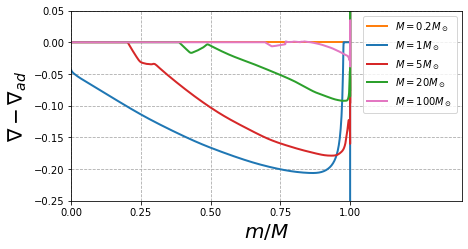

In [8]:
fig, ax = plt.subplots(figsize=(7,3.5), sharex=True)

ax.plot(star02['mass']  / star02['mass'][0],  star02['gradT_sub_grada'], c=colors[0], lw=2, label='$M = 0.2 M_\odot$')
ax.plot(star1['mass']   / star1['mass'][0],   star1['gradT_sub_grada'],  c=colors[1], lw=2, label='$M = 1 M_\odot$')
ax.plot(star5['mass']   / star5['mass'][0],   star5['gradT_sub_grada'],  c=colors[2], lw=2, label='$M = 5 M_\odot$')
ax.plot(star20['mass']  / star20['mass'][0],  star20['gradT_sub_grada'], c=colors[3], lw=2, label='$M = 20 M_\odot$')
ax.plot(star100['mass'] / star100['mass'][0], star100['gradT_sub_grada'],c=colors[4], lw=2, label='$M = 100 M_\odot$')
plt.xticks(np.linspace(0, 1, 5))
ax.set_xlim(0, 1.4)
ax.set_ylim(-0.25, 0.05)
ax.grid(c='#aaaaaa', ls='--')

ax.legend()
ax.set_ylabel(r'$\nabla - \nabla_{ad}$', size=20)

plt.xlabel(r"$m / M$", size=20)
plt.savefig(fig_dir / '2superadiabaticity.png', dpi=300, bbox_inches='tight')

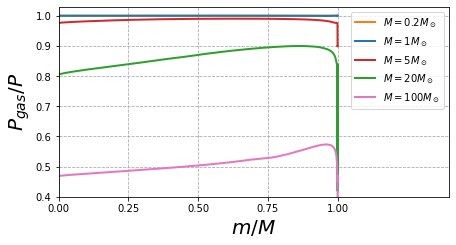

In [9]:
fig, ax = plt.subplots(figsize=(7,3.5), sharex=True)

ax.plot(star02['mass']  / star02['mass'][0],  star02['pgas_div_ptotal'], c=colors[0], lw=2, label='$M = 0.2 M_\odot$')
ax.plot(star1['mass']   / star1['mass'][0],   star1['pgas_div_ptotal'],  c=colors[1], lw=2, label='$M = 1 M_\odot$')
ax.plot(star5['mass']   / star5['mass'][0],   star5['pgas_div_ptotal'],  c=colors[2], lw=2, label='$M = 5 M_\odot$')
ax.plot(star20['mass']  / star20['mass'][0],  star20['pgas_div_ptotal'], c=colors[3], lw=2, label='$M = 20 M_\odot$')
ax.plot(star100['mass'] / star100['mass'][0], star100['pgas_div_ptotal'],c=colors[4], lw=2, label='$M = 100 M_\odot$')
plt.xticks(np.linspace(0, 1, 5))
ax.set_xlim(0, 1.4)
ax.set_ylim(0.4, 1.03)
ax.grid(c='#aaaaaa', ls='--')

ax.legend()
ax.set_ylabel(r'$P_{gas}/P$', size=20)

plt.xlabel(r"$m / M$", size=20)
plt.savefig(fig_dir / '2pgas_div_ptotal.png', dpi=300, bbox_inches='tight')

## 2

In [10]:
files = {'0.1' : data_dir/'LOGS_1M_NucFac01/',
         '1' : data_dir/'LOGS_1M_NucFac1',
         '10' : data_dir/'LOGS_1M_NucFac10',
        }

colors = ['tab:blue', 'tab:red', 'tab:green']

In [11]:
star01  = pd.read_csv(files['0.1'] / '1M.data', sep='\s+', header=4)
star1   = pd.read_csv(files['1']   / '1M.data', sep='\s+', header=4)
star10  = pd.read_csv(files['10']  / '1M.data', sep='\s+', header=4)

In [12]:
star01 = star01[star01['star_age'] > 1e8]
star1  = star1[star1['star_age']   > 1e8]
star10 = star10[star10['star_age'] > 1e8]

<ipython-input-13-55eb492d497e>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0.5, 0.75, 1, 1.5, 2])
<ipython-input-13-55eb492d497e>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.array([4000, 5000, 6000, 7000]) / 1000)


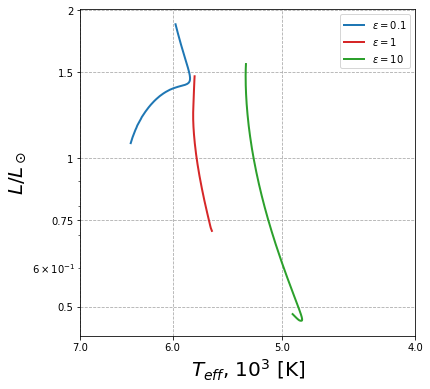

In [13]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(np.power(10, star01['log_Teff']), np.power(10, star01['log_L']), lw=2, c=colors[0], label=r'$\epsilon = 0.1$')
ax.plot(np.power(10, star1['log_Teff']), np.power(10, star1['log_L']), lw=2, c=colors[1], label=r'$\epsilon = 1$')
ax.plot(np.power(10, star10['log_Teff']), np.power(10, star10['log_L']), lw=2, c=colors[2], label=r'$\epsilon = 10$')
ax.grid(c='#aaaaaa', ls='--')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_yticklabels([0.5, 0.75, 1, 1.5, 2])
ax.set_yticks([0.5, 0.75, 1, 1.5, 2])
ax.set_xticklabels(np.array([4000, 5000, 6000, 7000]) / 1000)
ax.set_xticks(     [4000, 5000, 6000, 7000])
plt.legend()
ax.invert_xaxis()
plt.ylabel(r"$L / L_\odot$", size=20)
plt.xlabel(r"$T_{eff}$, $10^3 $ [K]", size=20)

plt.savefig(fig_dir / '2HR.png', dpi=300, bbox_inches='tight')

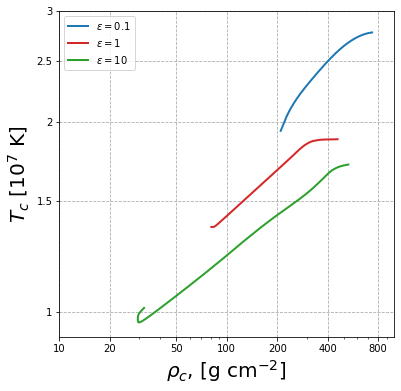

In [14]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(np.power(10, star01['log_cntr_Rho']), np.power(10, star01['log_cntr_T']), lw=2, c=colors[0], label=r'$\epsilon = 0.1$')
ax.plot(np.power(10, star1['log_cntr_Rho']), np.power(10, star1['log_cntr_T']), lw=2, c=colors[1], label=r'$\epsilon = 1$')
ax.plot(np.power(10, star10['log_cntr_Rho']), np.power(10, star10['log_cntr_T']), lw=2, c=colors[2], label=r'$\epsilon = 10$')
ax.grid(c='#aaaaaa', ls='--')

plt.xlim(10,1000)
plt.xscale('log')
plt.yscale('log')

plt.yticks([1e7, 1.5e7, 2e7, 2.5e7, 3e7 ], labels=[1, 1.5, 2, 2.5, 3 ])
plt.xticks([10, 20, 50, 100, 200, 400, 800], labels=[10, 20, 50, 100, 200, 400, 800])
# ax.invert_xaxis()
plt.ylabel(r"$T_c $ [10$^7$ K]", size=20)
plt.xlabel(r"$\rho_c$, [g cm$^{-2}$] ", size=20)

plt.legend()

plt.savefig(fig_dir / '2T-rho.png', dpi=300, bbox_inches='tight')

In [15]:
star01['star_age']

216    1.081713e+08
217    1.238559e+08
218    1.426775e+08
219    1.597089e+08
220    1.757809e+08
           ...     
347    7.643983e+08
348    7.644307e+08
349    7.644618e+08
350    7.644915e+08
351    7.645199e+08
Name: star_age, Length: 136, dtype: float64

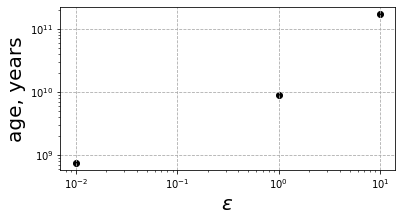

In [16]:
fig, ax = plt.subplots(figsize=(6, 3))
ax.scatter([0.01], star01['star_age'].iloc[-1], c='black')
ax.scatter([1], star1['star_age'].iloc[-1], c='black')
ax.scatter([10], star10['star_age'].iloc[-1], c='black')
# ax.plot(np.power(10, star1['log_cntr_T']), np.power(10, star1['log_cntr_Rho']), lw=2, c=colors[1], label=r'$\epsilon = 1$')
# ax.plot(np.power(10, star10['log_cntr_T']), np.power(10, star10['log_cntr_Rho']), lw=2, c=colors[2], label=r'$\epsilon = 10$')
ax.grid(c='#aaaaaa', ls='--')
ax.set_yscale('log')
ax.set_xscale('log')

# plt.legend()
plt.ylabel(r"age, years", size=20)
plt.xlabel(r"$\epsilon$ ", size=20)

plt.savefig(fig_dir / '2age_nucfac.png', dpi=300, bbox_inches='tight')

In [17]:
files = {'no-cno' : data_dir/'LOGS_5M_noCNO/profile5.data',
         'Z0' : data_dir/'LOGS_5M_Z0/profile5.data',
         'normal':data_dir/'LOGS_5/profile4.data'
        }

colors = ['tab:blue', 'tab:red', 'tab:green']

In [18]:
starZ0 = pd.read_csv(files['Z0'], sep='\s+', header=4)
starnocno  = pd.read_csv(files['no-cno'], sep='\s+', header=4)

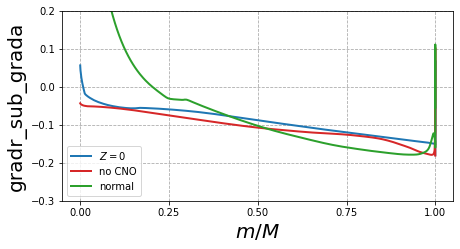

In [20]:
fig, ax = plt.subplots(figsize=(7,3.5), sharex=True)

ax.plot(starZ0['mass']  / starZ0['mass'][0],  starZ0['gradr_sub_grada'], c=colors[0], lw=2, label='$Z = 0$')
ax.plot(starnocno['mass']   / starnocno['mass'][0],   starnocno['gradr_sub_grada'],  c=colors[1], lw=2, label='no CNO')
ax.plot(star5['mass']  / star5['mass'][0],  star5['gradr_sub_grada'], c=colors[2], lw=2, label='normal')

plt.xticks(np.linspace(0, 1, 5))
# ax.set_xlim(0, 1.4)
ax.set_ylim(-0.3, 0.2)
ax.grid(c='#aaaaaa', ls='--')

ax.legend()
ax.set_ylabel(r'gradr_sub_grada', size=20)

plt.xlabel(r"$m / M$", size=20)
plt.savefig(fig_dir / '2superadiabaticity_metallicity.png', dpi=300, bbox_inches='tight')

In [20]:
files = {'no-cno' : data_dir/'LOGS_5M_noCNO/',
         'Z0' : data_dir/'LOGS_5M_Z0/',
         'normal':data_dir/'LOGS_5/'
        }

colors = ['tab:blue', 'tab:red', 'tab:green']

In [21]:
starZ0      = pd.read_csv(files['Z0'] / '5M.data', sep='\s+', header=4)
starnocno   = pd.read_csv(files['no-cno']   / '5M.data', sep='\s+', header=4)
starnormal  = pd.read_csv(files['normal']  / '5M.data', sep='\s+', header=4)

In [22]:
starZ0 = starZ0[starZ0['star_age'] > 1e5]
starnocno  = starnocno[starnocno['star_age']   > 1e5]
starnormal = starnormal[starnormal['star_age'] > 1e5]

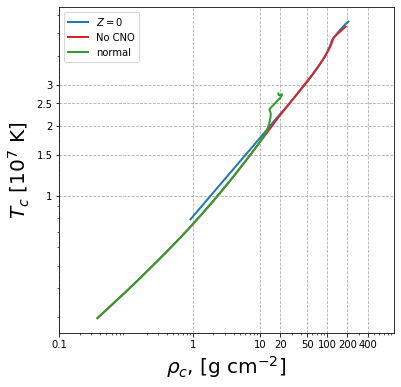

In [23]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(np.power(10, starZ0['log_cntr_Rho']), np.power(10, starZ0['log_cntr_T']), lw=2, c=colors[0], label=r'$Z = 0$')
ax.plot(np.power(10, starnocno['log_cntr_Rho']), np.power(10, starnocno['log_cntr_T']), lw=2, c=colors[1], label=r'No CNO')
ax.plot(np.power(10, starnormal['log_cntr_Rho']), np.power(10, starnormal['log_cntr_T']), lw=2, c=colors[2], label=r'normal')
ax.grid(c='#aaaaaa', ls='--')

plt.xlim(10,1000)
plt.xscale('log')
plt.yscale('log')

plt.yticks([1e7, 1.5e7, 2e7, 2.5e7, 3e7 ], labels=[1, 1.5, 2, 2.5, 3 ])
plt.xticks([0.01, 1, 10, 20, 50, 100, 200, 400], labels=[0.10, 1, 10, 20, 50, 100, 200, 400])
# ax.invert_xaxis()
plt.ylabel(r"$T_c $ [10$^7$ K]", size=20)
plt.xlabel(r"$\rho_c$, [g cm$^{-2}$] ", size=20)

plt.legend()

plt.savefig(fig_dir / '2T-rho_chemistry.png', dpi=300, bbox_inches='tight')

<ipython-input-24-ed4ef31c263b>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([100, 200, 500, 1000, 1500])
<ipython-input-24-ed4ef31c263b>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.array([5000, 6000, 7000, 10000, 20000, 30000]) / 1000)


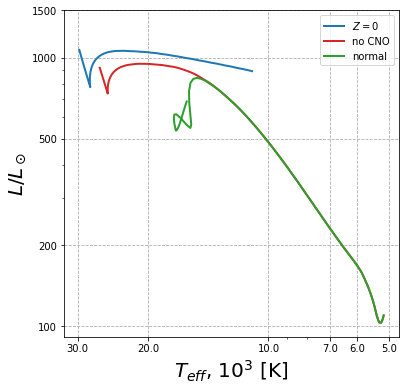

In [24]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(np.power(10, starZ0['log_Teff']), np.power(10, starZ0['log_L']), lw=2, c=colors[0], label=r'$Z = 0$')
ax.plot(np.power(10, starnocno['log_Teff']), np.power(10, starnocno['log_L']), lw=2, c=colors[1], label=r'no CNO')
ax.plot(np.power(10, starnormal['log_Teff']), np.power(10, starnormal['log_L']), lw=2, c=colors[2], label=r'normal')
ax.grid(c='#aaaaaa', ls='--')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_yticklabels([100, 200, 500, 1000, 1500])
ax.set_yticks([100, 200, 500, 1000, 1500])
ax.set_xticklabels(np.array([5000, 6000, 7000, 10000, 20000, 30000]) / 1000)
ax.set_xticks(     [5000, 6000, 7000, 10000, 20000, 30000])
plt.legend()
ax.invert_xaxis()
plt.ylabel(r"$L / L_\odot$", size=20)
plt.xlabel(r"$T_{eff}$, $10^3 $ [K]", size=20)

plt.savefig(fig_dir / '2HR_chemistry.png', dpi=300, bbox_inches='tight')

In [25]:
ksi = 3.828e33 / 26 / 1.602 *1e6

In [26]:
p = 1e-42 * 1.4 * 695700 * 1e5 / 1.67 * 1e24

In [27]:
ksi * (1 - p) / 4 / np.pi / (150e11) ** 2

32504512875.10733

In [28]:
m_p = 1.67e-27

In [29]:
N = 1 / (24 * 3600 * 1e-42 * 0.02 * 0.01 * 3.25e10) 

In [30]:
N * 74 * m_p

220049.85754985758

In [31]:
N * 18e-3 / 6.02e23 * 0.264172

14064.869239287842